In [175]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()
import seaborn as sbn
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


# Poblation

In [229]:
poblation= pd.read_sql("""
SELECT mb.runtime_minutes, mr.numvotes, mr.averagerating
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null 
  AND mb.runtime_minutes < 300 AND mb.runtime_minutes > 30
  AND mr.numvotes > 250000
  
  
  ;
""", conn)
#ORDER BY mr.numvotes, mb.runtime_minutes DESC
#AND mr.numvotes > 400000
#  AND mr.averagerating > 6
poblation.info()
#poblation.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   runtime_minutes  217 non-null    float64
 1   numvotes         217 non-null    int64  
 2   averagerating    217 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.2 KB


In [230]:
poblation.describe()

,runtime_minutes,numvotes,averagerating
count,217.000000,2.170000e+02,217.000000
mean,123.387097,4.543959e+05,7.395853
std,19.746951,2.101956e+05,0.653149
min,83.000000,2.509760e+05,4.100000
25%,108.000000,3.155840e+05,7.000000
50%,123.000000,3.955720e+05,7.500000
75%,136.000000,5.358360e+05,7.800000
max,181.000000,1.841066e+06,8.800000


In [231]:
p_mean=poblation["runtime_minutes"].mean()
p_std=poblation["runtime_minutes"].std()
print(p_mean,p_std)

123.38709677419355 19.746950523009474


# Sample

In [232]:
sample= pd.read_sql("""
SELECT mb.runtime_minutes, mr.numvotes, mr.averagerating
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null 
  AND mb.runtime_minutes < 150 AND mb.runtime_minutes > 90
  AND mr.numvotes > 250000
  
  
  ;
""", conn)
#ORDER BY mr.numvotes, mb.runtime_minutes DESC
#AND mr.numvotes > 400000
#  AND mr.averagerating > 6
sample.info()
#poblation.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   runtime_minutes  194 non-null    float64
 1   numvotes         194 non-null    int64  
 2   averagerating    194 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.7 KB


In [233]:
sample.describe()

,runtime_minutes,numvotes,averagerating
count,194.000000,1.940000e+02,194.000000
mean,119.850515,4.421106e+05,7.375773
std,15.259528,1.858725e+05,0.629566
min,91.000000,2.522810e+05,4.100000
25%,108.000000,3.154860e+05,7.000000
50%,120.000000,3.938130e+05,7.500000
75%,132.000000,5.311872e+05,7.800000
max,149.000000,1.841066e+06,8.800000


In [234]:
s_mean=sample["runtime_minutes"].mean()
s_std=sample["runtime_minutes"].std()
print(s_mean,s_std)

119.85051546391753 15.259527720785385


# Z-score

In [235]:
z = (s_mean - p_mean)/(p_std/np.sqrt(78))
z

-1.5817247518946056

In [236]:
stats.norm.cdf(z)

0.05685620981403068

In [197]:
print(1 - stats.norm.cdf(z))

0.9999999619655949


# Testing


In [181]:
import numpy as np 
x = np.array([434, 694, 457, 534, 720, 400, 484, 478, 610, 641, 425, 636, 454,
514, 563, 370, 499, 640, 501, 625, 612, 471, 598, 509, 531])
x_bar = x.mean()
n = len(x)
mu = 500
sigma = 100
z = (x_bar - mu)/(sigma/np.sqrt(n))
p = 1 - stats.norm.cdf(z)
p,z, x.mean()


(0.03593031911292577, 1.8, 536.0)

# Correlation

## Sample

In [237]:
cr_s_run=list(sample["runtime_minutes"])
cr_s_rat=list(sample["numvotes"])
#print(cr_s_run,cr_s_votes)

No handles with labels found to put in legend.


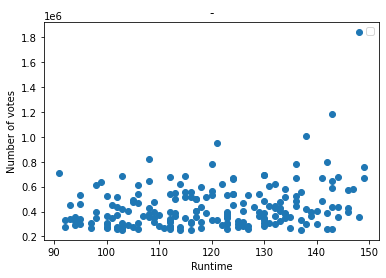

In [244]:
fig, ax = plt.subplots()

ax.scatter(cr_s_run, cr_s_rat)
#label="actual data"

x_bounds = [min(cr_s_run), max(cr_s_run)]
y_bounds = [800000,800000]

#ax.plot(cr_s_run, y_bounds, "--", label="perfect correlation")

ax.set_title("-")
ax.set_xlabel("Runtime")
ax.set_ylabel("Number of votes")

ax.legend();

## Poblation

In [240]:
cr_p_run=list(poblation["runtime_minutes"])
cr_p_rat=list(poblation["numvotes"])
len(cr_p_run)
#print(cr_s_run,cr_s_votes)

217

No handles with labels found to put in legend.


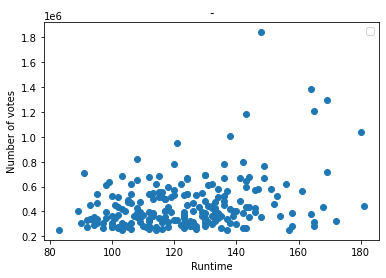

In [241]:
fig, ax = plt.subplots()

ax.scatter(cr_p_run, cr_p_rat)
#label="actual data"

x_bounds = [min(cr_p_run), max(cr_p_run)]
y_bounds = [min(cr_p_rat), max(cr_p_rat)]

#ax.plot(x_bounds, y_bounds, "--", label="perfect correlation")

ax.set_title("-")
ax.set_xlabel("Runtime")
ax.set_ylabel("Number of votes")

ax.legend();

In [92]:
nueva1= pd.read_sql("""
SELECT mr.averagerating
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null 
 
  ORDER BY mr.numvotes, mb.runtime_minutes DESC
  
  
  ;
""", conn)
#
nueva1.head()

,averagerating
0,8.6
1,5.8
2,7.2
3,8.0
4,6.8


In [106]:
allruntime= pd.read_sql("""
SELECT mb.runtime_minutes, mr.numvotes, mr.averagerating, mb.genres
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null 
 
  ORDER BY mb.runtime_minutes DESC
  
  
  ;
""", conn)
#
allruntime.head(20)
# AND mr.numvotes > 40000
# GROUP BY mb.genres

,runtime_minutes,numvotes,averagerating,genres
0,51420.0,17,5.0,Documentary
1,14400.0,69,6.2,Documentary
2,1440.0,219,8.9,Drama
3,1100.0,5,8.6,"Comedy,History"
4,808.0,100,8.5,"Drama,Fantasy,Musical"
5,746.0,162,8.2,Documentary
6,724.0,59,8.5,Documentary
7,720.0,19,7.8,Documentary
8,607.0,218,9.3,Documentary
9,601.0,22,8.6,Drama


In [56]:
run=list(allruntime["runtime_minutes"])
votes=list(allruntime["numvotes"])
#print(run,rat)
correlation = np.corrcoef(run,votes)
correlation[0][1]

0.01242764319536531

In [57]:
covariance = np.cov(run,votes)
covariance[0][1]

83495.60323921194

In [58]:
rm=sum(run)/65720
rst=np.std(run)
rst

209.37542392280452

In [59]:
rm

94.7322732805843

In [61]:
vm=sum(votes)/65720
vst=np.std(votes)
print(vm, vst)

3954.6738435788193 32087.99038387164


In [83]:
# plotrun=allruntime["runtime_minutes"]
# plotrun.info()

In [247]:
rat= pd.read_sql("""
SELECT mb.runtime_minutes
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null 
  AND mb.runtime_minutes < 400 AND mb.runtime_minutes > 40
  AND mr.numvotes > 700000
  
  
  ;
""", conn)
#ORDER BY mr.numvotes, mb.runtime_minutes DESC
#AND mr.numvotes > 400000
#  AND mr.averagerating > 6
rat.info()
rat.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   runtime_minutes  15 non-null     float64
dtypes: float64(1)
memory usage: 248.0 bytes


,runtime_minutes
10,91.0
11,165.0
12,121.0
13,149.0
14,136.0


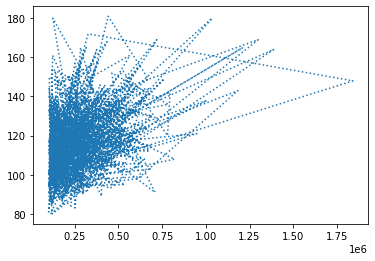

In [228]:

vo=list(rat["numvotes"])
minu=list(rat["runtime_minutes"])
plt.plot(vo,minu,linestyle='dotted')

C:\Users\amalagonsanchez\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

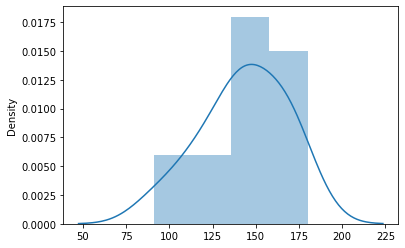

In [248]:
sbn.distplot(rat)

## Hypothesis

H0 A movie with a duration of 120 min will have more than 250 000 votes as well as a big audience
HA A movie with a duration of 120 min doesn't have more than 250 000 votes as well as a big audience